In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from common import settings
from common.dataset import StockDataSet
from envs.fast_trading_env import FastTradingEnv
from evaluation.evaluator import Evaluator

In [2]:
ds = StockDataSet()
stock_codes = ds.stock_list(min_days=settings.EPISODE_LENGTH)
valid_stock_codes = stock_codes[ds.TRAIN_SIZE:ds.TRAIN_SIZE+ds.VALID_SIZE]
evalator = Evaluator(model_dir=settings.MODEL_DATA_DIR, input_shape=(settings.EPISODE_LENGTH, settings.FEATURE_NUM))

In [4]:
# load model
from policy.resnet_trading_model import ResnetTradingModel
evaluate_model = 'resnet_18.1512798453.h5'
em = ResnetTradingModel(
    name=evaluate_model,
    model_dir=settings.MODEL_DATA_DIR,
    input_shape=(settings.EPISODE_LENGTH, settings.FEATURE_NUM),
    load_model=True,
    specific_model_name=evaluate_model
)

Using TensorFlow backend.


actions:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]
signals:  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
predict_reward:  -0.00664291
real_reward:  0.02858625504


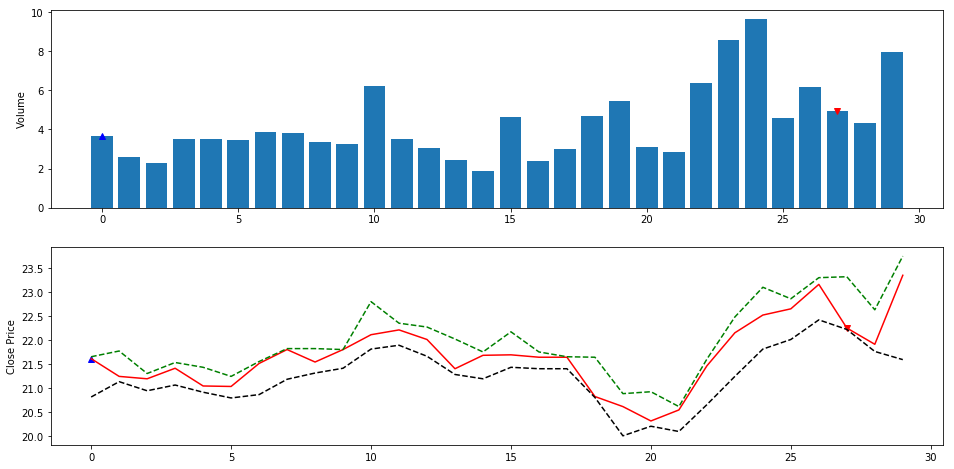

In [28]:
env = FastTradingEnv(name=np.random.choice(valid_stock_codes, 1)[0], days=settings.EPISODE_LENGTH, use_adjust_close=False)
evals_history = evalator.evaluate_on_env(model=em, env=env)
evalator.show_plot(evals_history)